
Perform the following operation using titanic data set.
1. check how the price of the ticket (column name: &#39;fare&#39;) for each
passenger is distributed by plotting a histogram.
2. plot a box plot for distribution of age with respect to each gender along
with the information about whether they survived or not. (Column
names : &#39;sex&#39; and &#39;age&#39;)
3. Write observations on the inference from the above statistics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# null_age = df[df['Age'].isnull()]
# null_age
# null_rows = df[df.isnull().any(axis=1)]
# null_rows
age_mode = df['Age'].mode()
age_mode

0    24.0
Name: Age, dtype: float64

In [7]:
cabin_mode = df['Cabin'].mode()
cabin_mode

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [8]:
embark_mode = df['Embarked'].mode()
embark_mode

0    S
Name: Embarked, dtype: object

In [9]:
for col in df.columns:
    if col == 'Age':
        df[col].fillna(24, inplace = True)
    elif col == 'Cabin':
        df[col].fillna('C23 C25 C27', inplace = True)
    elif col == 'Embarked':
        df[col].fillna('S', inplace = True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


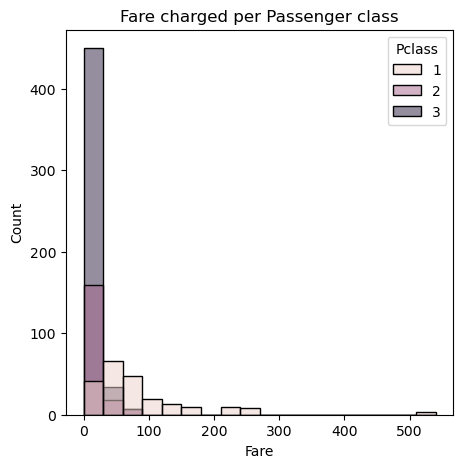

In [14]:

plt.figure(figsize=(5,5))
plt.title('Fare charged per Passenger class')
sns.histplot(df, x='Fare',hue='Pclass', binwidth=30)
plt.show()

<Axes: xlabel='count', ylabel='Pclass'>

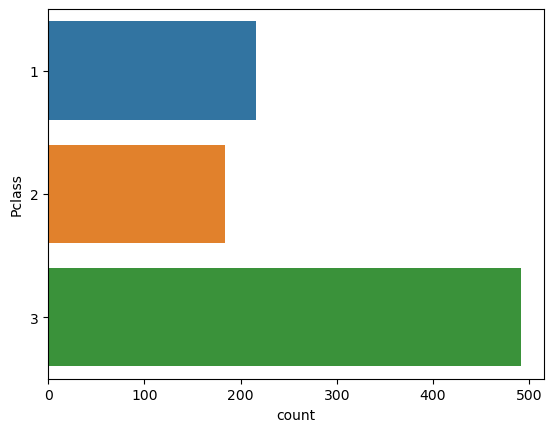

In [20]:
sns.countplot(y=df['Pclass'])

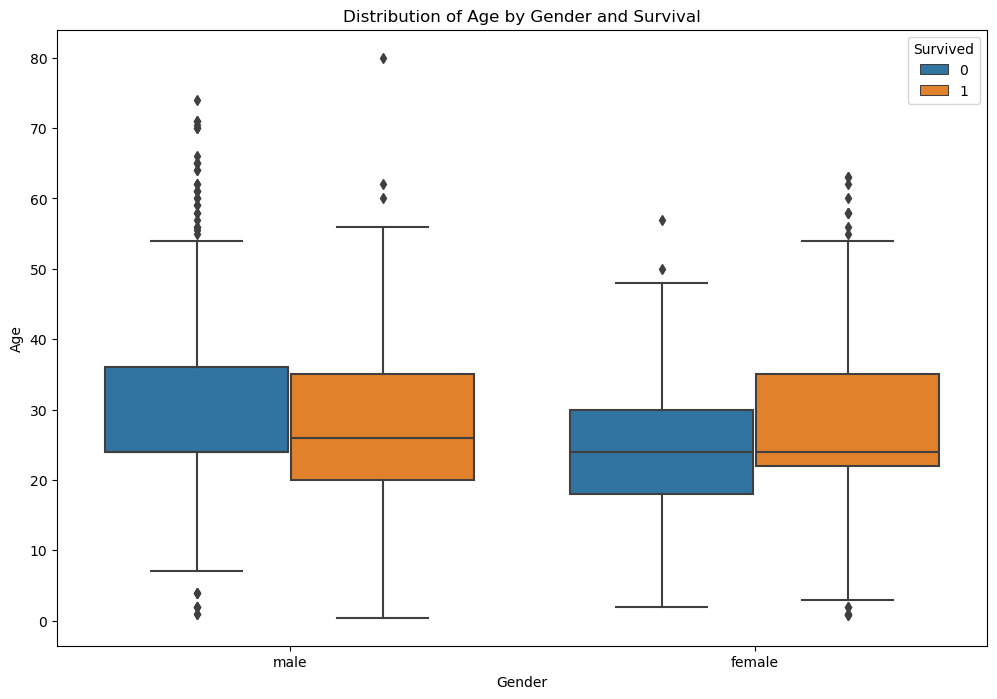

In [49]:
# Plot box plot of age by gender and survival
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
plt.title('Distribution of Age by Gender and Survival')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

In [52]:
#observations
df_survived_age = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]['Age'].median()
df_survived_male = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]['Age'].count()
df_survived_male
# df_survived_age

109